In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.spatial.distance as distance
%matplotlib inline

/Users/johnsnyder/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


# Ghost Notes: What's the difference?

Ghost notes are an important part of many drum patterns. Similar to shakers, bells, hand drums, and other percussion instruments, they provide additional texture and complexity to the rhythm of a song.

Lately, I've been listening quite a bit to my guilty pleasure, Animals as Leaders, an instrumental progressive metal band. Their drummer, Matt Gartska, is _very, very, very_ good (Matt, if you're reading this, I'd like a lesson, please). One of Matt's greatest strengths in my opinion is his ability to play very clean and precise ghost notes within almost any rhythm.

For this notebook, I'm going to use AAL's song Physical Education as an example. This features a beat that 1) is the keystone of this song and 2) I learned this week (I'm very happy).

Here's a video of Matt playing the song, with added embellishment from what's in the original recording: https://www.youtube.com/watch?v=fp1aLl9FfcQ.

At the beginning of the song, Matt is playing that core rhythm between the kick, snare, and cymbal stack. Hear those ghost notes on the snare drum? At 0:46 in the video, Matt plays the bare bones, "main beat" of the song. Immediately following that beat, he adds ghost notes (in addition to some funky cymbal work - let's not think about that stuff for now). The general rhythm is there, but those ghost notes add a wonderful layer of complexity to the beat.

_Note: Anecdotal confirmation from the Youtube comments that I'm using a good song as an example: "That snare is permanently haunted. Holy shit his ghost notes game is on point." I agree Youtuber, I agree._

### Rhythm 1
This is what the bare-bones beat looks like (**many thanks to DrumsTheWord.com for these transcriptions!**):
![Phys Ed bare bones beat](/files/Side_Projects/Percussion_Rhythms_as_Vectors/phys_ed_1.jpg "Physical Education Bare Bones Rhythm")

Of course, these can be broken down into a matrix:


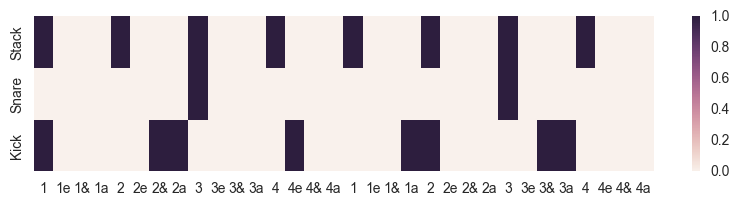

In [2]:
# Create dictionary of drum parts
pattern1 = {'Time':['1','1e','1&','1a','2','2e','2&','2a','3','3e','3&','3a','4','4e','4&','4a',
                      '1','1e','1&','1a','2','2e','2&','2a','3','3e','3&','3a','4','4e','4&','4a'],
         'Kick':[1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
        'Snare':[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        'Stack':[1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0]}
# Transform dictionary into dataframe
pattern1_df = pd.DataFrame(pattern1, index=pattern1['Time'],
                              columns=['Stack','Snare','Kick']).ix[:,:3].T

plt.figure(figsize=(10,2))
sns.heatmap(pattern1_df)

### Rhythm 2
And this is what the ghost-noted beat looks like:
![Phys Ed Ghost Notes Beat](/files/Side_Projects/Percussion_Rhythms_as_Vectors/phys_ed_2.jpg "Physical Education Ghost Notes Rhythm")

#### Rhythm 2 has a couple approaches

When transformed into a matrix, this can look one of two (or more?) ways: either by viewing ghost notes as snare hits but with a quarter of the strength (maybe less than a quarter - that's an arbitrary selection), or by viewing ghost notes as a separate layer from the full-strength snare hits.

**Here's the first approach...**

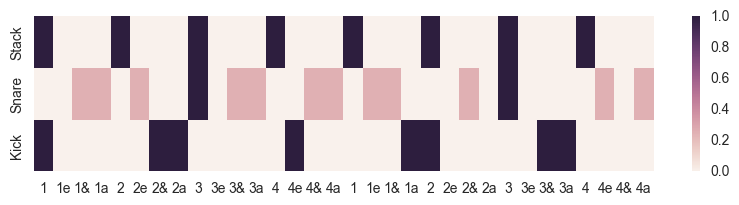

In [3]:
# Approach 1 - ghost notes are fractions of full strength notes
pattern2 = {'Time':['1','1e','1&','1a','2','2e','2&','2a','3','3e','3&','3a','4','4e','4&','4a',
                      '1','1e','1&','1a','2','2e','2&','2a','3','3e','3&','3a','4','4e','4&','4a'],
         'Kick':[1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
        'Snare':[0, 0, 0.25, 0.25, 0, 0.25, 0, 0, 1, 0, 0.25, 0.25, 0, 0, 0.25, 0.25, 0, 0.25, 0.25, 0, 0, 0, 0.25, 0, 1, 0, 0, 0, 0, 0.25, 0, 0.25],
        'Stack':[1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0]}
# Transform dictionary into dataframe
pattern2_df = pd.DataFrame(pattern2, index=pattern2['Time'],
                              columns=['Stack','Snare','Kick']).ix[:,:3].T

plt.figure(figsize=(10,2))
sns.heatmap(pattern2_df)

**And here's the second approach:**

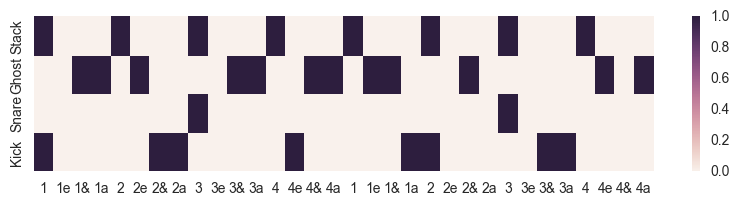

In [4]:
# Approach 2 - ghost notes are a separate layer of notes from full snare hits
pattern2_2 = {'Time':['1','1e','1&','1a','2','2e','2&','2a','3','3e','3&','3a','4','4e','4&','4a',
                      '1','1e','1&','1a','2','2e','2&','2a','3','3e','3&','3a','4','4e','4&','4a'],
         'Kick':[1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
        'Snare':[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        'Ghost':[0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1],
        'Stack':[1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0]}
# Transform dictionary into dataframe
pattern2_2_df = pd.DataFrame(pattern2_2, index=pattern2_2['Time'],
                              columns=['Stack','Ghost','Snare','Kick']).ix[:,:4].T

plt.figure(figsize=(10,2))
sns.heatmap(pattern2_2_df)

# Comparing Rhythms using Ghost Note Approach 1

Using the approach laid out in the second workbook of this "series"...

In [5]:
pat1pat2_dist = {}
for i,j in zip(pattern1_df.index, range(len(pattern2_df.index))):
    pat1pat2_dist["{}".format(i)]=distance.euclidean(pattern1_df.ix[j,:],pattern2_df.ix[j,:])
pat1pat2_dist

{'Kick': 0.0, 'Snare': 0.8660254037844386, 'Stack': 0.0}

In [6]:
print 'Distance between Core Pattern and Ghost Note Patter 1: {:.3f}'.format(np.mean(pat1pat2_dist.values()))

Distance between Core Pattern and Ghost Note Patter 1: 0.289


# Comparing Rhythms using Ghost Note Approach 2

In order to compare rhythms using the second approach to handle ghost notes, I'll need to add another row to Rhythm 1 representing the snare's ghost notes. In other words, we can picture Rhythm 1 to have the option of hitting a ghost note but never doing it.

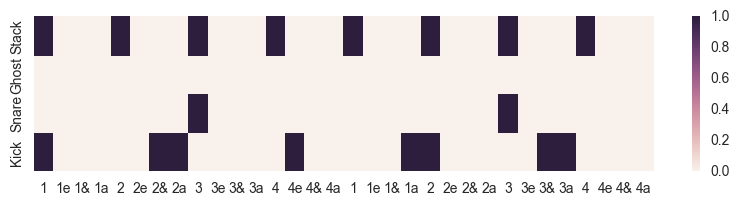

In [7]:
# Alternative structure of Rhythm 1 (with ghost note row)
pattern1_g = {'Time':['1','1e','1&','1a','2','2e','2&','2a','3','3e','3&','3a','4','4e','4&','4a',
                      '1','1e','1&','1a','2','2e','2&','2a','3','3e','3&','3a','4','4e','4&','4a'],
         'Kick':[1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
        'Snare':[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        'Ghost':[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        'Stack':[1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0]}
# Transform dictionary into dataframe
pattern1_g_df = pd.DataFrame(pattern1_g, index=pattern1_g['Time'],
                              columns=['Stack','Ghost','Snare','Kick']).ix[:,:4].T

plt.figure(figsize=(10,2))
sns.heatmap(pattern1_g_df)

And now we can calculate distance:

In [8]:
pat1pat2_2_dist = {}
for i,j in zip(pattern1_g_df.index, range(len(pattern2_2_df.index))):
    pat1pat2_2_dist["{}".format(i)]=distance.euclidean(pattern1_g_df.ix[j,:],pattern2_2_df.ix[j,:])
pat1pat2_2_dist

{'Ghost': 3.4641016151377544, 'Kick': 0.0, 'Snare': 0.0, 'Stack': 0.0}

In [9]:
print 'Distance between Core Pattern and Ghost Note Pattern 1: {:.3f}'.format(np.mean(pat1pat2_2_dist.values()))

Distance between Core Pattern and Ghost Note Pattern 1: 0.866


# Checkpoint - Findings

First off - the distance we find in Ghost Note Approach 2 is the same value that we get for the distance between snare vectors in Ghost Note Approach 1... iiiiiiiiinteresting.

If we treat ghost notes as a *separate* layer from the snare line, the distance between the overall rhythms increases by nearly 200 percent. This is probably due to the fact that the ghost notes in Rhythm 2 Approach 2 are represented as integer values, 0 or 1, as opposed to 0.25.

If we keep a separate row/vector for the ghost notes but populate hits with 0.25 instead of 1, we get a result pretty close to what we get in Approach 1.

See below:

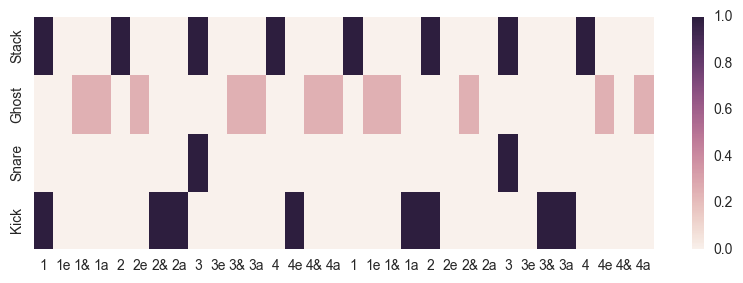

In [10]:
# Approach 3 - ghost notes are a separate layer of notes from full snare hits, but rated as 0.25
pattern2_2g = {'Time':['1','1e','1&','1a','2','2e','2&','2a','3','3e','3&','3a','4','4e','4&','4a',
                      '1','1e','1&','1a','2','2e','2&','2a','3','3e','3&','3a','4','4e','4&','4a'],
         'Kick':[1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
        'Snare':[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        'Ghost':[0, 0, 0.25, 0.25, 0, 0.25, 0, 0, 0, 0, 0.25, 0.25, 0, 0, 0.25, 0.25, 0, 0.25, 0.25, 0, 0, 0, 0.25, 0, 0, 0, 0, 0, 0, 0.25, 0, 0.25],
        'Stack':[1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0]}
# Transform dictionary into dataframe
pattern2_2g_df = pd.DataFrame(pattern2_2g, index=pattern2_2g['Time'],
                              columns=['Stack','Ghost','Snare','Kick']).ix[:,:4].T

plt.figure(figsize=(10,3))
sns.heatmap(pattern2_2g_df)

In [11]:
pat1pat2_2g_dist = {}
for i,j in zip(pattern1_g_df.index, range(len(pattern2_2g_df.index))):
    pat1pat2_2g_dist["{}".format(i)]=distance.euclidean(pattern1_g_df.ix[j,:],pattern2_2g_df.ix[j,:])

print 'Distance between Core Pattern and Ghost Note Pattern 2 \
with Adjusted Ghost Note Magnitude: {:.3f}'.format(np.mean(pat1pat2_2g_dist.values()))

Distance between Core Pattern and Ghost Note Pattern 2 with Adjusted Ghost Note Magnitude: 0.217


# Determining the Optimal Approach

After a fair amount of internal debate and some conversations with a fellow drummer (thanks, Nate), my current thinking is that **Ghost Note Approach 3: Separating out ghost notes into their own vector, but keeping their magnitude low** is _generally_ a good approach to take, with exceptions.

#### Pro's
- Splitting out the ghost notes allows us to put aside some textural components of the rhythm and compare the "core" elements of the beat with each other (e.g., snare, kick, hihat, or some other combination), if needed. It also allows us to more heavily weight core elements of the kit (in our example, we average across four instruments instead three, so ghost notes have 25% weight, as opposed to a 33% weight in Approach 1.
- Including the relative magnitude of the ghost note allows us to capture more of the nuance that it adds to a beat. This could be done to capture note magnitude for other instruments as well.
- Also, in other percussive instruments, such as congas, a single drum can produce multiple tones, and this is reflected in the way music is written for that instrument.

#### Con's
- If we compare a beat that has ghost notes with one that does not, we are averaging across more instruments than originally included in the second beat. For example, is it fair for this approach to include another row of data for Rhythm 1 that it never intended to use? In this approach, we averaged the four distances, whereas in Approach 1, we averaged across three distances. This problem could possibly grow if I'm comparing a rhythm that has 8 instruments with another that only has 3. And, in this case, perhaps Ghost Note Approach 1 (including notes in the main snare line) would be more appropriate to consolidate the number of instruments.


---

_**So to wrap up,**_ it is acceptable to treat ghost notes as its own instrument (and its own 1-D vector), though it's advisable to first understand the extent of the rhythms we are comparing. I'll probably revisit this line of thinking over the coming week or two after a few more conversations and time away from it.

In the meantime, I'll start trying to learn the rest of Physical Education... :-|